In [175]:
# By seen Data we have to predict price so it is Regression problem 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [176]:
#Importing Data
df=pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [177]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [178]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [179]:
# by seeing head and tail it have been obseved that Categorical as well as numerical data is present 

In [180]:
# checking null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [181]:
#all data in correct format and no missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [182]:
#checking unique values
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [183]:
# We have 3 Categorical Data and rest numerical Data

In [184]:
#Changing Categorical data to numerical data by using ordinal encoder

OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.3 KB


In [186]:
#checking Co-Relation
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [ ]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.savefig('./sampleImages/Cor')
plt.show()

In [188]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [189]:
#BMI ,Charges(ignore),rest are catogorical Data 

In [190]:
#Checking Distribution of Dta

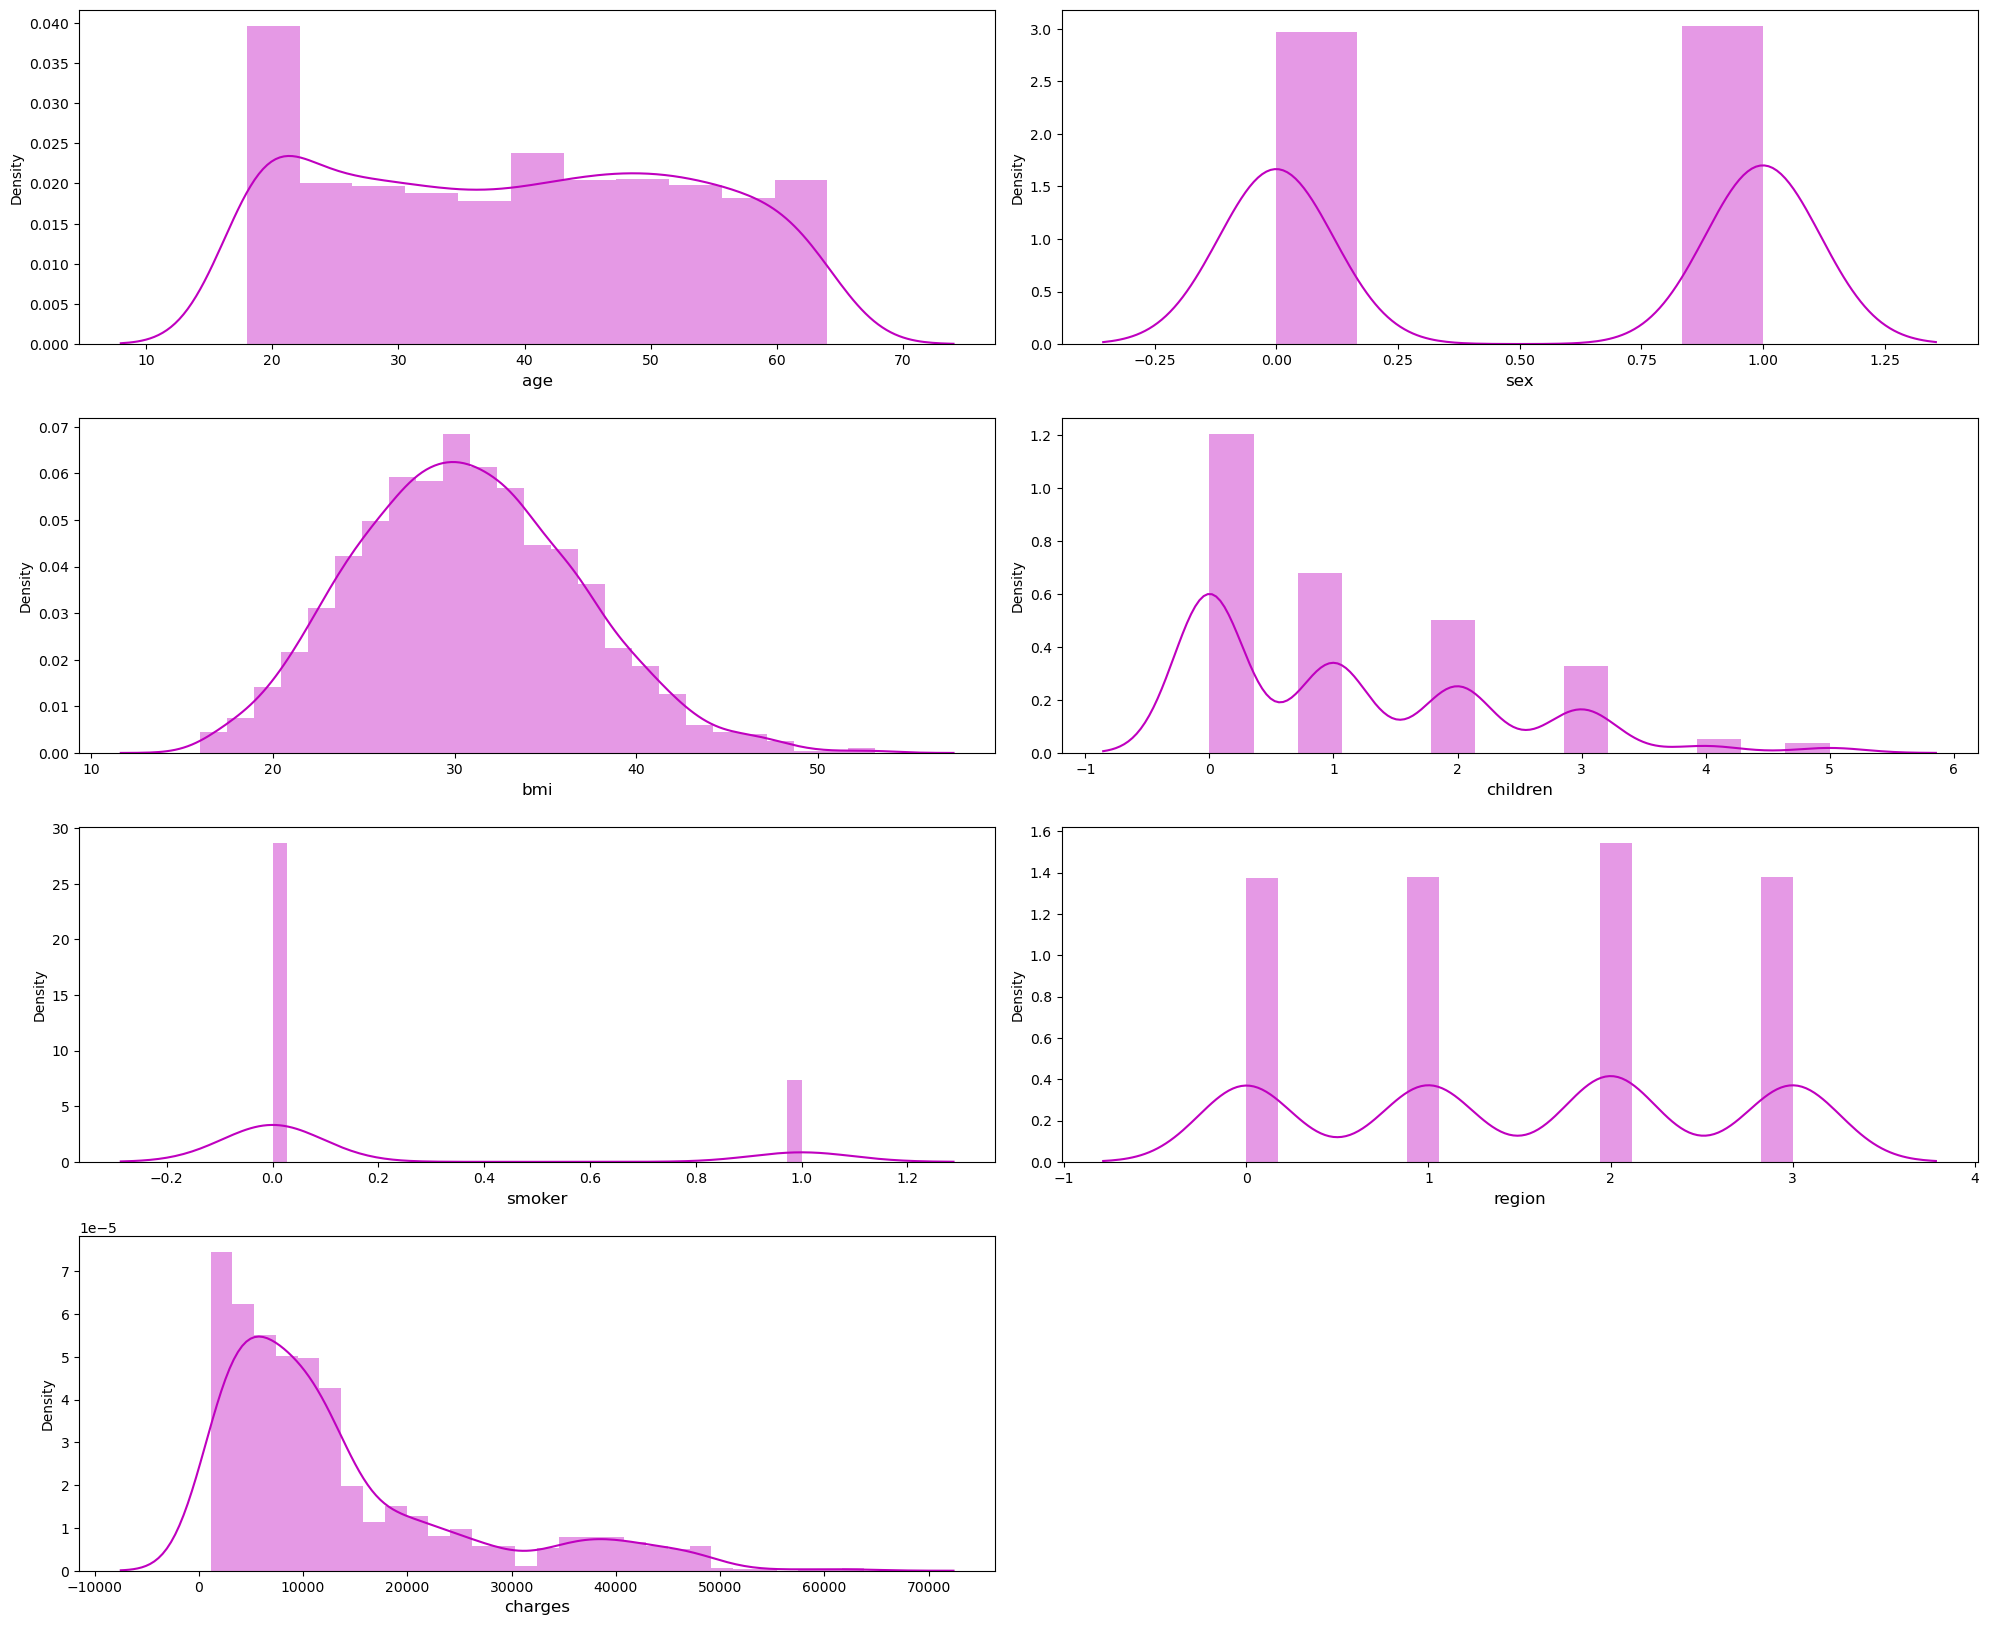

In [191]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,20))
plotnumber=1
for col in df:
    if plotnumber<=8:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()


# We have to see Distribution of only numerical data not catagorical data and also ignore Charges for categorical data we use count mthod 

1.0    676
0.0    662
Name: sex, dtype: int64


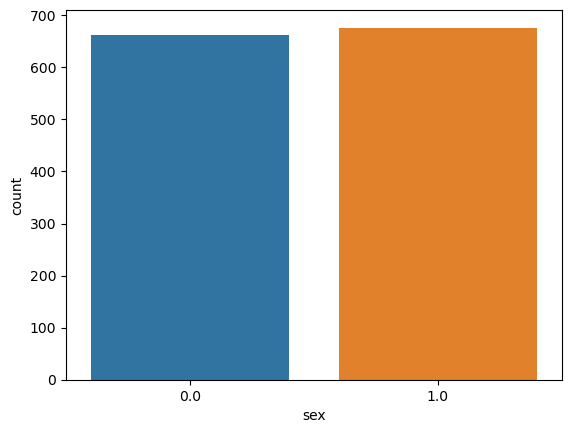

In [192]:
# making graph along with count plots for categorical data
ax=sns.countplot(data=df,x='sex')
print(df['sex'].value_counts())

2.0    364
3.0    325
1.0    325
0.0    324
Name: region, dtype: int64


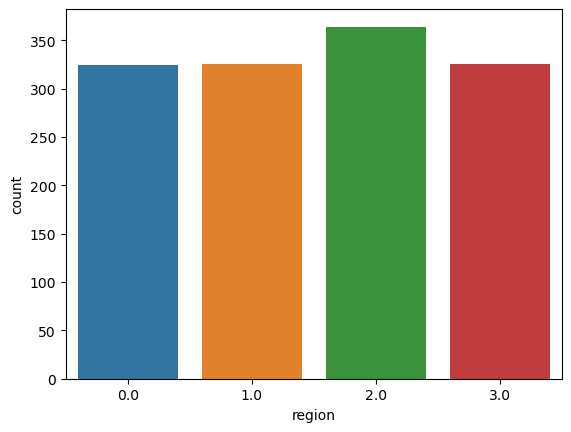

In [193]:
ax=sns.countplot(data=df,x='region')
print(df['region'].value_counts())

0.0    1064
1.0     274
Name: smoker, dtype: int64


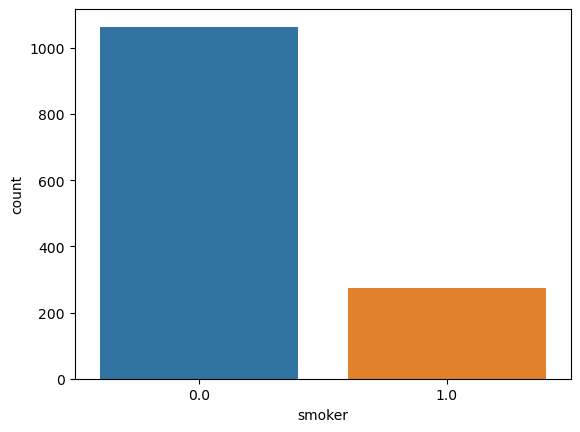

In [194]:
#biasness seen in Data
ax=sns.countplot(data=df,x='smoker')
print(df['smoker'].value_counts())

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


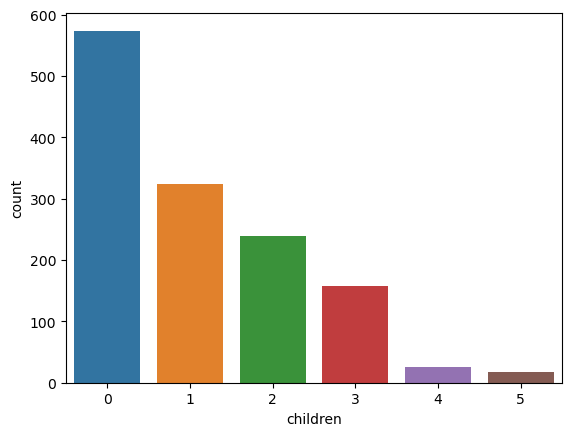

In [195]:
# also shows uneven distribution of data 
ax=sns.countplot(data=df,x='children')
print(df['children'].value_counts())

In [196]:
#Splitting the target and variable
x=df.drop('charges', axis=1)
y=df['charges']


In [197]:
x.shape

(1338, 6)

In [198]:
y.shape

(1338,)

In [199]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

In [200]:
#Feature scaling scaling  standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905


In [201]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=90)

In [202]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (936, 6) (402, 6)


In [203]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [204]:
#Applying ML Models
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_test)
print('R2_score:',r2_score(y_test,pred_LR))
print('Mean obsolute error-',mean_absolute_error(y_test,pred_LR))
print('Mean Squarer Error-',mean_squared_error(y_test,pred_LR))
print('root mean square error-',np.sqrt(mean_squared_error(y_test,pred_LR)))


R2_score: 0.7615496497255286
Mean obsolute error- 4297.265331868314
Mean Squarer Error- 35213089.20367658
root mean square error- 5934.061779563521


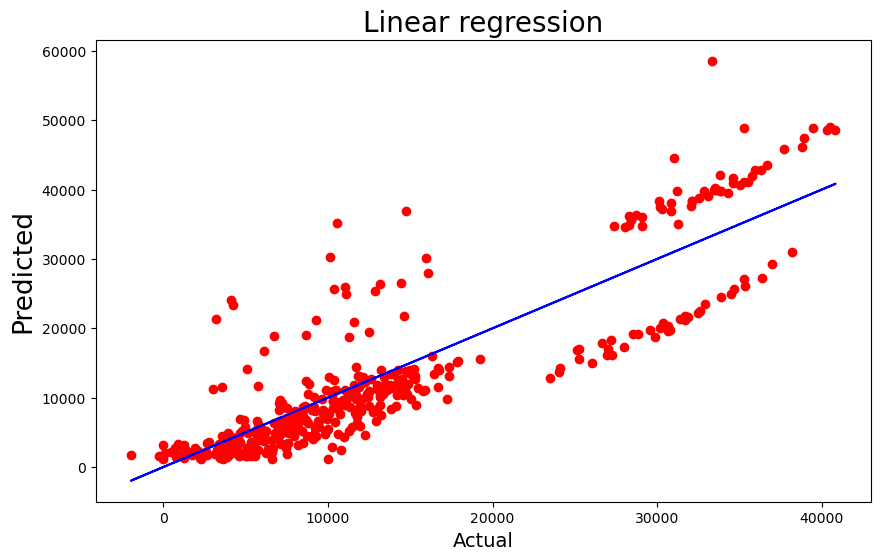

In [205]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=19)
plt.title('Linear regression',fontsize=20)
plt.show()

In [206]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_test)
print('R2_score:',r2_score(y_test,pred_RFR))
#print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean obsolute error-',mean_absolute_error(y_test,pred_RFR))
print('Mean Squarer Error-',mean_squared_error(y_test,pred_RFR))
print('root mean square error-',np.sqrt(mean_squared_error(y_test,pred_RFR)))


R2_score: 0.8442092553163165
Mean obsolute error- 2792.3082334202245
Mean Squarer Error- 23006354.92184921
root mean square error- 4796.494023956374


In [207]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [208]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_test)
print('R2_score:',r2_score(y_test,pred_knn))
#print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean obsolute error-',mean_absolute_error(y_test,pred_knn))
print('Mean Squarer Error-',mean_squared_error(y_test,pred_knn))
print('root mean square error-',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score: 0.8326043484005747
Mean obsolute error- 3131.0525681825866
Mean Squarer Error- 24720106.325250383
root mean square error- 4971.9318504229705


In [209]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_test)
print('R2_score:',r2_score(y_test,pred_GBR))
#print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean obsolute error-',mean_absolute_error(y_test,pred_GBR))
print('Mean Squarer Error-',mean_squared_error(y_test,pred_GBR))
print('root mean square error-',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.8748478292696136
Mean obsolute error- 2468.543143337467
Mean Squarer Error- 18481812.028752033
root mean square error- 4299.047804892617


In [210]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_test)
print('R2_score:',r2_score(y_test,pred_lasso))
print('Mean obsolute error-',mean_absolute_error(y_test,pred_lasso))
print('Mean Squarer Error-',mean_squared_error(y_test,pred_lasso))
print('root mean square error-',np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score: 0.76154658888314
Mean obsolute error- 4297.006448562327
Mean Squarer Error- 35213541.212725624
root mean square error- 5934.099865415616


In [211]:
ridge=Ridge()

ridge.fit(x_train,y_train)
pred_ridge=ridge.predict(x_test)
pred_train=ridge.predict(x_test)
print('R2_score:',r2_score(y_test,pred_ridge))
#print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean obsolute error-',mean_absolute_error(y_test,pred_ridge))
print('Mean Squarer Error-',mean_squared_error(y_test,pred_ridge))
print('root mean square error-',np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2_score: 0.7615189843280611
Mean obsolute error- 4299.021444456718
Mean Squarer Error- 35217617.70772469
root mean square error- 5934.443335960391


In [212]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()

DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)
pred_train=DTR.predict(x_test)
print('R2_score:',r2_score(y_test,pred_DTR))
#print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean obsolute error-',mean_absolute_error(y_test,pred_DTR))
print('Mean Squarer Error-',mean_squared_error(y_test,pred_DTR))
print('root mean square error-',np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2_score: 0.658250424036636
Mean obsolute error- 3470.963786835821
Mean Squarer Error- 50467773.647070035
root mean square error- 7104.067401641825


In [213]:
from sklearn . svm import SVR

svr=SVR()

svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_test)
print('R2_score:',r2_score(y_test,pred_svr))
#print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean obsolute error-',mean_absolute_error(y_test,pred_svr))
print('Mean Squarer Error-',mean_squared_error(y_test,pred_svr))
print('root mean square error-',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score: -0.0912753202947203
Mean obsolute error- 8442.591203609612
Mean Squarer Error- 161153779.6236266
root mean square error- 12694.635860221693


In [214]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()

etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_test)
print('R2_score:',r2_score(y_test,pred_etr))
#print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean obsolute error-',mean_absolute_error(y_test,pred_etr))
print('Mean Squarer Error-',mean_squared_error(y_test,pred_etr))
print('root mean square error-',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_score: 0.833352509595604
Mean obsolute error- 2631.8078080057476
Mean Squarer Error- 24609621.828712758
root mean square error- 4960.808586179552


In [215]:
from sklearn.model_selection import cross_val_score 

In [216]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between r2 score and cross validation score is',(r2_score(y_test,pred_LR)-score.mean())*100)

[0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
0.7472559473580954
Difference between r2 score and cross validation score is 1.4293702367433214


In [217]:
score=cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print('Difference between r2 score and cross validation score is',(r2_score(y_test,pred_RFR)-score.mean())*100)


[0.85274191 0.77500569 0.87032071 0.83082586 0.8525853 ]
0.8362958909885829
Difference between r2 score and cross validation score is 0.7913364327733596


In [218]:
score=cross_val_score(knn,x,y)
print(score)
print(score.mean())
print('Difference between r2 score and cross validation score is',(r2_score(y_test,pred_knn)-score.mean())*100)

[0.8221881  0.7555254  0.83987794 0.8050002  0.80856984]
0.8062322958732286
Difference between r2 score and cross validation score is 2.637205252734609


In [219]:
score=cross_val_score(GBR,x,y)
print(score)
print(score.mean())
print('Difference between r2 score and cross validation score is',(r2_score(y_test,pred_GBR)-score.mean())*100)

[0.87512401 0.79213953 0.89420007 0.84919394 0.8597697 ]
0.8540854509458823
Difference between r2 score and cross validation score is 2.076237832373129


In [220]:
score=cross_val_score(lasso,x,y)
print(score)
print(score.mean())
print('Difference between r2 score and cross validation score is',(r2_score(y_test,pred_lasso)-score.mean())*100)

[0.76124697 0.70842054 0.77784891 0.73364937 0.75513888]
0.7472609349374297
Difference between r2 score and cross validation score is 1.4285653945710242


In [221]:
score=cross_val_score(ridge,x,y)
print(score)
print(score.mean())
print('Difference between r2 score and cross validation score is',(r2_score(y_test,pred_ridge)-score.mean())*100)

[0.76124956 0.70849269 0.77774855 0.73370746 0.75510598]
0.7472608501582405
Difference between r2 score and cross validation score is 1.425813416982058


In [222]:
score=cross_val_score(svr,x,y)
print(score)
print(score.mean())
print('Difference between r2 score and cross validation score is',(r2_score(y_test,pred_svr)-score.mean())*100)

[-0.10984404 -0.10765325 -0.07634203 -0.10157605 -0.1023228 ]
-0.09954763482596678
Difference between r2 score and cross validation score is 0.8272314531246481


In [223]:
#As seen in cross validation score we found than minimum difference in Random forest regressor 
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param= {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gscv=GridSearchCV(RandomForestRegressor(),param)
gscv.fit(x_train,y_train)